In [13]:
!pip3 install numpy
!pip3 install sympy
!pip3 install matplotlib
!pip3 install pandas

In [265]:
import sympy as sym
import numpy as np
import random
import math
from sympy import symbols
import matplotlib.pyplot as plt
import pandas as pd

In [276]:
#degree of polynomial
n = 5
weights = symbols(' '.join(f'w{i}' for i in range(n)))
b , x =symbols('b , x')


In [277]:
data=[[3.301106268217131, 48.964735877965126],
 [3.680497981606467, 19.983712353824682],
 [1.2986893535517263, 87.91104321094862],
 [7.125751118281201, -56.11875461584728],
 [3.570824114663428, 28.67153706146601],
 [5.634283821257961, -99.86501096586917],
 [0.10016982864539906, 8.165112405036444],
 [3.5404903426913634, 31.03829741626706],
 [7.665805902728792, -15.297207793045072],
 [4.027846971377264, -8.220935625838951],
 [0.2714752038597792, 21.978642520304472],
 [4.022744866226188, -7.805890953636469],
 [3.5916314165273655, 27.03822205262428],
 [3.08305673392962, 63.7512527527004],
 [7.481400614923249, -29.954431988619376],
 [1.3201248081552452, 88.78510197773446],
 [4.33592980844959, -32.77735577379606],
 [3.815799537043432, 9.06124767040564],
 [6.920625838944181, -69.27933874578349],
 [5.990158529858783, -101.67590746496617],
 [4.360350800205976, -34.658041176015914],
 [4.181020801511323, -20.586457564798962],
 [0.04819841656104848, 3.932016284501059],
 [1.5231160628500469, 95.73519716296524],
 [0.9566874555074175, 70.66452025830992],
 [5.620690356092751, -99.63334963299639],
 [6.266691475156812, -97.41521266756601],
 [1.7072660242818993, 99.86456285792111],
 [4.688529616484148, -58.36817542031125],
 [7.302691738996355, -43.54103231372669]]
datax=[data[i][0] for i in range(len(data))]
datay=[data[i][1] for i in range(len(data))]

In [278]:
fa=b
for i in range(len(weights)):
    fa+=weights[i]*(x**i)
print(fa)
f=0
for i in range(len(datay)):
    ycap=fa.subs(x,datax[i])
    residual=(datay[i]-ycap)**2
    f+=residual


b + w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4


In [279]:
def derivative(wb):
    bias=wb[0]
    weight=wb[1:]
    derivatives=[]
    derivatives.append(f.diff(b))
    for i in range(n):
        derivatives.append(f.diff(weights[i]))
    for i in range(len(derivatives)):
        derivatives[i]=derivatives[i].subs(b,bias)
        derivatives[i] = derivatives[i].subs([(weights[i],weight[i]) for i in range(len(weights))])
    return derivatives

def derivative(wb):
    bias = wb[0]
    weight = wb[1:]
    f_grad_b = f.diff(b).subs(b, bias)
    f_grad_w = [f.diff(weights[i]).subs([(b, bias), (weights[i], wb[i+1])]) for i in range(n)]
    f_grad = [f_grad_b] + f_grad_w
    f_grad_func = sym.lambdify((b,) + weights, f_grad, "numpy")
    return f_grad_func(*wb)

In [280]:
def function_evaluation(wb):
    bias=wb[0]
    weight=wb[1:]
    f1 = f.subs(list(zip(weights, weight)))
    f1 = f1.subs(b, bias)
    ret = f1.evalf()
    return ret

In [284]:
def gradient_descent(learning_rate,initial_guess):
    values=[initial_guess]
    function_values=[function_evaluation(initial_guess)]
    i=0
    temp_values=0
    while(1):
        #values.append(values[i] - learning_rate * derivative(values[i]))
        values.append([values[i][j] - learning_rate * derivative(values[i])[j] for j in range(n+1)])
        #values.append([values[i][j] - learning_rate * d for j, d in enumerate(derivative(values[i]))])
        function_values.append(function_evaluation(values[i]))
        print(i, "  ",function_evaluation(values[i]))
        if i > 5000 or abs(function_evaluation(values[i]) - function_evaluation(values[i-1])) < 0.01:
            break
        i+=1
    return (values[len(values)-1])

In [285]:
initial_guess = []
for i in range(n+1):
    random_num = random.randint(1, 10) 
    initial_guess.append(random_num)  

In [286]:
finals=gradient_descent(0.000000001,initial_guess)
print(finals)

0    3340514868.47596
1    2709656600.62486
2    2197942613.75056
3    1782871245.23704
4    1446190510.39104
5    1173095505.64038
6    951577390.660862
7    771895322.141418
8    626148118.465063
9    507926820.063209
10    412032867.436418
11    334249504.248502
12    271156353.373702
13    219979012.226311
14    178467053.609394
15    144795067.398701
16    117482391.555371
17    95328002.7892403
18    77357703.8117638
19    62781284.8370155
20    50957775.5881176
21    41367259.8312319
22    33588013.0340990
23    27277957.8205297
24    22159621.7592348
25    18007936.0339615
26    14640338.4643380
27    11908745.6763229
28    9693041.41351078
29    7895794.64999316
30    6437975.24369221
31    5255478.73405637
32    4296307.46861330
33    3518284.10370591
34    2887196.93489396
35    2375295.50140353
36    1960070.31165080
37    1623263.03055838
38    1350063.60350745
39    1128459.01195700
40    948705.023479780
41    802897.707413165
42    684625.874329392
43    588689.15600242

346    173868.870872513
347    173859.659791370
348    173850.449360486
349    173841.239579815
350    173832.030449311
351    173822.821968929
352    173813.614138621
353    173804.406958343
354    173795.200428049
355    173785.994547691
356    173776.789317226
357    173767.584736606
358    173758.380805785
359    173749.177524718
360    173739.974893359
361    173730.772911662
362    173721.571579582
363    173712.370897071
364    173703.170864084
365    173693.971480576
366    173684.772746500
367    173675.574661810
368    173666.377226461
369    173657.180440408
370    173647.984303602
371    173638.788816000
372    173629.593977555
373    173620.399788221
374    173611.206247953
375    173602.013356704
376    173592.821114429
377    173583.629521081
378    173574.438576615
379    173565.248280986
380    173556.058634146
381    173546.869636051
382    173537.681286655
383    173528.493585911
384    173519.306533775
385    173510.120130199
386    173500.934375138
387    173491.74

688    170756.296519396
689    170747.305168763
690    170738.314452863
691    170729.324371649
692    170720.334925077
693    170711.346113103
694    170702.357935681
695    170693.370392767
696    170684.383484316
697    170675.397210282
698    170666.411570622
699    170657.426565290
700    170648.442194242
701    170639.458457432
702    170630.475354816
703    170621.492886349
704    170612.511051986
705    170603.529851683
706    170594.549285394
707    170585.569353075
708    170576.590054682
709    170567.611390168
710    170558.633359489
711    170549.655962602
712    170540.679199460
713    170531.703070019
714    170522.727574234
715    170513.752712061
716    170504.778483455
717    170495.804888371
718    170486.831926763
719    170477.859598589
720    170468.887903801
721    170459.916842357
722    170450.946414211
723    170441.976619318
724    170433.007457634
725    170424.038929114
726    170415.071033713
727    170406.103771386
728    170397.137142089
729    170388.17

1029    167726.749291325
1030    167717.971804767
1031    167709.194937829
1032    167700.418690466
1033    167691.643062635
1034    167682.868054291
1035    167674.093665392
1036    167665.319895893
1037    167656.546745751
1038    167647.774214922
1039    167639.002303362
1040    167630.231011027
1041    167621.460337873
1042    167612.690283858
1043    167603.920848936
1044    167595.152033065
1045    167586.383836200
1046    167577.616258298
1047    167568.849299315
1048    167560.082959208
1049    167551.317237932
1050    167542.552135444
1051    167533.787651700
1052    167525.023786656
1053    167516.260540270
1054    167507.497912496
1055    167498.735903291
1056    167489.974512612
1057    167481.213740415
1058    167472.453586656
1059    167463.694051292
1060    167454.935134278
1061    167446.176835571
1062    167437.419155128
1063    167428.662092904
1064    167419.905648857
1065    167411.149822941
1066    167402.394615115
1067    167393.640025333
1068    167384.886053552


1357    164880.708939476
1358    164872.132357856
1359    164863.556381659
1360    164854.981010842
1361    164846.406245361
1362    164837.832085174
1363    164829.258530239
1364    164820.685580512
1365    164812.113235951
1366    164803.541496513
1367    164794.970362155
1368    164786.399832835
1369    164777.829908509
1370    164769.260589136
1371    164760.691874671
1372    164752.123765073
1373    164743.556260299
1374    164734.989360306
1375    164726.423065051
1376    164717.857374491
1377    164709.292288585
1378    164700.727807288
1379    164692.163930559
1380    164683.600658355
1381    164675.037990632
1382    164666.475927349
1383    164657.914468461
1384    164649.353613928
1385    164640.793363706
1386    164632.233717752
1387    164623.674676024
1388    164615.116238479
1389    164606.558405074
1390    164598.001175767
1391    164589.444550514
1392    164580.888529274
1393    164572.333112003
1394    164563.778298659
1395    164555.224089200
1396    164546.670483581


1685    162099.809871427
1686    162091.429591568
1687    162083.049903260
1688    162074.670806460
1689    162066.292301128
1690    162057.914387221
1691    162049.537064698
1692    162041.160333517
1693    162032.784193636
1694    162024.408645013
1695    162016.033687607
1696    162007.659321375
1697    161999.285546276
1698    161990.912362269
1699    161982.539769311
1700    161974.167767361
1701    161965.796356376
1702    161957.425536316
1703    161949.055307138
1704    161940.685668800
1705    161932.316621262
1706    161923.948164480
1707    161915.580298414
1708    161907.213023022
1709    161898.846338261
1710    161890.480244091
1711    161882.114740469
1712    161873.749827353
1713    161865.385504703
1714    161857.021772476
1715    161848.658630630
1716    161840.296079125
1717    161831.934117917
1718    161823.572746965
1719    161815.211966229
1720    161806.851775665
1721    161798.492175232
1722    161790.133164889
1723    161781.774744594
1724    161773.416914305


2013    159382.559555965
2014    159374.371080158
2015    159366.183182348
2016    159357.995862494
2017    159349.809120556
2018    159341.622956492
2019    159333.437370262
2020    159325.252361824
2021    159317.067931139
2022    159308.884078165
2023    159300.700802862
2024    159292.518105188
2025    159284.335985103
2026    159276.154442566
2027    159267.973477536
2028    159259.793089972
2029    159251.613279834
2030    159243.434047081
2031    159235.255391672
2032    159227.077313566
2033    159218.899812722
2034    159210.722889099
2035    159202.546542658
2036    159194.370773356
2037    159186.195581154
2038    159178.020966010
2039    159169.846927884
2040    159161.673466734
2041    159153.500582521
2042    159145.328275203
2043    159137.156544740
2044    159128.985391090
2045    159120.814814214
2046    159112.644814069
2047    159104.475390617
2048    159096.306543815
2049    159088.138273623
2050    159079.970580000
2051    159071.803462906
2052    159063.636922299


2341    156727.499659209
2342    156719.498592799
2343    156711.498091142
2344    156703.498154199
2345    156695.498781931
2346    156687.499974296
2347    156679.501731256
2348    156671.504052770
2349    156663.506938799
2350    156655.510389303
2351    156647.514404241
2352    156639.518983574
2353    156631.524127262
2354    156623.529835265
2355    156615.536107543
2356    156607.542944056
2357    156599.550344765
2358    156591.558309630
2359    156583.566838610
2360    156575.575931666
2361    156567.585588758
2362    156559.595809847
2363    156551.606594891
2364    156543.617943852
2365    156535.629856690
2366    156527.642333364
2367    156519.655373835
2368    156511.668978063
2369    156503.683146009
2370    156495.697877632
2371    156487.713172892
2372    156479.729031750
2373    156471.745454166
2374    156463.762440100
2375    156455.779989513
2376    156447.798102363
2377    156439.816778612
2378    156431.836018221
2379    156423.855821148
2380    156415.876187354


2669    154133.205261071
2670    154125.387310093
2671    154117.569910930
2672    154109.753063541
2673    154101.936767889
2674    154094.121023934
2675    154086.305831637
2676    154078.491190960
2677    154070.677101862
2678    154062.863564306
2679    154055.050578252
2680    154047.238143662
2681    154039.426260496
2682    154031.614928715
2683    154023.804148280
2684    154015.993919153
2685    154008.184241295
2686    154000.375114666
2687    153992.566539227
2688    153984.758514941
2689    153976.951041767
2690    153969.144119666
2691    153961.337748601
2692    153953.531928531
2693    153945.726659418
2694    153937.921941223
2695    153930.117773908
2696    153922.314157432
2697    153914.511091758
2698    153906.708576846
2699    153898.906612657
2700    153891.105199153
2701    153883.304336294
2702    153875.504024042
2703    153867.704262357
2704    153859.905051202
2705    153852.106390536
2706    153844.308280321
2707    153836.510720519
2708    153828.713711089


2997    151598.284089668
2998    151590.645058544
2999    151583.006566591
3000    151575.368613771
3001    151567.731200046
3002    151560.094325377
3003    151552.457989726
3004    151544.822193056
3005    151537.186935328
3006    151529.552216505
3007    151521.918036547
3008    151514.284395418
3009    151506.651293079
3010    151499.018729491
3011    151491.386704618
3012    151483.755218420
3013    151476.124270860
3014    151468.493861899
3015    151460.863991501
3016    151453.234659625
3017    151445.605866235
3018    151437.977611293
3019    151430.349894760
3020    151422.722716598
3021    151415.096076770
3022    151407.469975236
3023    151399.844411960
3024    151392.219386903
3025    151384.594900028
3026    151376.970951295
3027    151369.347540668
3028    151361.724668107
3029    151354.102333576
3030    151346.480537035
3031    151338.859278448
3032    151331.238557775
3033    151323.618374980
3034    151315.998730023
3035    151308.379622868
3036    151300.761053475


3325    149121.375773277
3326    149113.911562559
3327    149106.447878657
3328    149098.984721536
3329    149091.522091157
3330    149084.059987484
3331    149076.598410480
3332    149069.137360106
3333    149061.676836327
3334    149054.216839104
3335    149046.757368401
3336    149039.298424180
3337    149031.840006404
3338    149024.382115037
3339    149016.924750039
3340    149009.467911376
3341    149002.011599009
3342    148994.555812901
3343    148987.100553014
3344    148979.645819313
3345    148972.191611759
3346    148964.737930316
3347    148957.284774946
3348    148949.832145611
3349    148942.380042276
3350    148934.928464903
3351    148927.477413454
3352    148920.026887892
3353    148912.576888181
3354    148905.127414282
3355    148897.678466160
3356    148890.230043776
3357    148882.782147094
3358    148875.334776077
3359    148867.887930686
3360    148860.441610886
3361    148852.995816639
3362    148845.550547908
3363    148838.105804655
3364    148830.661586844


3653    146701.151109430
3654    146693.857713595
3655    146686.564832507
3656    146679.272466130
3657    146671.980614427
3658    146664.689277361
3659    146657.398454896
3660    146650.108146997
3661    146642.818353626
3662    146635.529074747
3663    146628.240310324
3664    146620.952060320
3665    146613.664324699
3666    146606.377103426
3667    146599.090396462
3668    146591.804203773
3669    146584.518525321
3670    146577.233361071
3671    146569.948710986
3672    146562.664575029
3673    146555.380953165
3674    146548.097845357
3675    146540.815251569
3676    146533.533171764
3677    146526.251605906
3678    146518.970553959
3679    146511.690015886
3680    146504.409991652
3681    146497.130481219
3682    146489.851484552
3683    146482.573001614
3684    146475.295032369
3685    146468.017576781
3686    146460.740634813
3687    146453.464206429
3688    146446.188291593
3689    146438.912890268
3690    146431.638002418
3691    146424.363628007
3692    146417.089766999


3981    144336.311350750
3982    144329.184856054
3983    144322.058864312
3984    144314.933375486
3985    144307.808389543
3986    144300.683906445
3987    144293.559926158
3988    144286.436448646
3989    144279.313473874
3990    144272.191001805
3991    144265.069032405
3992    144257.947565639
3993    144250.826601469
3994    144243.706139862
3995    144236.586180781
3996    144229.466724190
3997    144222.347770056
3998    144215.229318341
3999    144208.111369010
4000    144200.993922029
4001    144193.876977360
4002    144186.760534970
4003    144179.644594822
4004    144172.529156881
4005    144165.414221112
4006    144158.299787478
4007    144151.185855945
4008    144144.072426477
4009    144136.959499038
4010    144129.847073594
4011    144122.735150108
4012    144115.623728544
4013    144108.512808869
4014    144101.402391046
4015    144094.292475039
4016    144087.183060814
4017    144080.074148334
4018    144072.965737565
4019    144065.857828471
4020    144058.750421016


4309    142025.587507160
4310    142018.624089532
4311    142011.661163332
4312    142004.698728527
4313    141997.736785081
4314    141990.775332961
4315    141983.814372130
4316    141976.853902554
4317    141969.893924200
4318    141962.934437031
4319    141955.975441014
4320    141949.016936113
4321    141942.058922294
4322    141935.101399522
4323    141928.144367762
4324    141921.187826980
4325    141914.231777141
4326    141907.276218211
4327    141900.321150154
4328    141893.366572937
4329    141886.412486523
4330    141879.458890879
4331    141872.505785970
4332    141865.553171762
4333    141858.601048219
4334    141851.649415306
4335    141844.698272990
4336    141837.747621236
4337    141830.797460009
4338    141823.847789273
4339    141816.898608996
4340    141809.949919141
4341    141803.001719674
4342    141796.054010562
4343    141789.106791768
4344    141782.160063258
4345    141775.213824998
4346    141768.268076953
4347    141761.322819089
4348    141754.378051370


4637    139767.739664074
4638    139760.935587058
4639    139754.131990212
4640    139747.328873501
4641    139740.526236891
4642    139733.724080349
4643    139726.922403841
4644    139720.121207332
4645    139713.320490789
4646    139706.520254178
4647    139699.720497464
4648    139692.921220615
4649    139686.122423595
4650    139679.324106372
4651    139672.526268911
4652    139665.728911179
4653    139658.932033141
4654    139652.135634763
4655    139645.339716013
4656    139638.544276855
4657    139631.749317255
4658    139624.954837181
4659    139618.160836598
4660    139611.367315472
4661    139604.574273770
4662    139597.781711457
4663    139590.989628500
4664    139584.198024864
4665    139577.406900516
4666    139570.616255422
4667    139563.826089549
4668    139557.036402861
4669    139550.247195326
4670    139543.458466910
4671    139536.670217578
4672    139529.882447297
4673    139523.095156033
4674    139516.308343752
4675    139509.522010420
4676    139502.736156004


4965    137561.556316204
4966    137554.907928958
4967    137548.260010880
4968    137541.612561936
4969    137534.965582093
4970    137528.319071319
4971    137521.673029579
4972    137515.027456841
4973    137508.382353072
4974    137501.737718239
4975    137495.093552307
4976    137488.449855246
4977    137481.806627020
4978    137475.163867597
4979    137468.521576944
4980    137461.879755028
4981    137455.238401815
4982    137448.597517273
4983    137441.957101368
4984    137435.317154068
4985    137428.677675338
4986    137422.038665147
4987    137415.400123460
4988    137408.762050246
4989    137402.124445470
4990    137395.487309100
4991    137388.850641102
4992    137382.214441444
4993    137375.578710092
4994    137368.943447013
4995    137362.308652174
4996    137355.674325542
4997    137349.040467085
4998    137342.407076768
4999    137335.774154559
5000    137329.141700425
5001    137322.509714332
[7.99040170624209, 2.99040170624212, 3.94214956308198, 4.69561653473554, -0

In [ ]:
print(function_evaluation(initial_guess))
print(initial_guess)
print(derivative(initial_guess))

(w0, w1, w2)
[10.8849659883953, 3.32762209910952, -2.22767059032797]


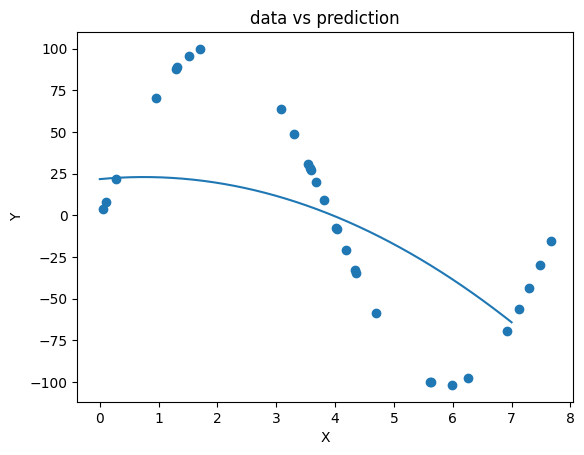

In [263]:
plt.scatter(datax, datay)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data vs prediction')

fin=fa.subs(b,finals[0])
weight=finals[1:]
print(weights)
print(weight)
#fin=fin.subs(f.subs(weights[i],weight[i]) for i in range(len(weight)))
fin = fin.subs({weights[i]: weight[i] for i in range(len(weight))})
f = sym.lambdify(x, fin, 'numpy')
x_vals = np.linspace(0, 7, 200)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
# Show the plot
plt.show()

(w0, w1, w2, w3)
[2.97149508778940, 9.74434168520992, 1.69377195426310, -0.648923600218886]


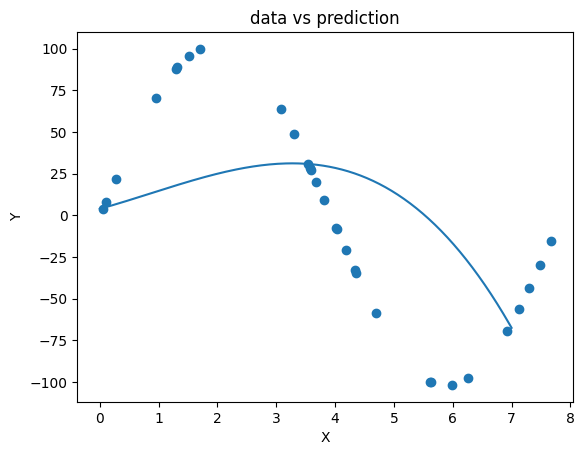

In [275]:
plt.scatter(datax, datay)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data vs prediction')

fin=fa.subs(b,finals[0])
weight=finals[1:]
print(weights)
print(weight)
#fin=fin.subs(f.subs(weights[i],weight[i]) for i in range(len(weight)))
fin = fin.subs({weights[i]: weight[i] for i in range(len(weight))})
f = sym.lambdify(x, fin, 'numpy')
x_vals = np.linspace(0, 7, 200)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
# Show the plot
plt.show()

In [1]:
plt.scatter(datax, datay)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data vs prediction')

fin=fa.subs(b,finals[0])
weight=finals[1:]
print(weights)
print(weight)
#fin=fin.subs(f.subs(weights[i],weight[i]) for i in range(len(weight)))
fin = fin.subs({weights[i]: weight[i] for i in range(len(weight))})
f = sym.lambdify(x, fin, 'numpy')
x_vals = np.linspace(0, 7, 200)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
# Show the plot
plt.show()

NameError: name 'plt' is not defined